### Feature Selection Techniques

In [1]:
import pandas as pd
df=pd.read_csv('mobile_dataset.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Univariate Selection

In [2]:
# Dependent and independent Feature  
X=df.iloc[:,:-1]
y=df['price_range']

In [3]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [4]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [6]:
df.shape

(2000, 21)

In [7]:
X.shape

(2000, 20)

In [8]:
y.shape

(2000,)

In [9]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

#  In Many Steps

In [10]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=15) # Score function =chi2
ordered_feature=ordered_rank_features.fit(X,y)


In [11]:
ordered_rank_features

SelectKBest(k=15, score_func=<function chi2 at 0x00000239C285BB80>)

In [12]:
ordered_feature.scores_ #  # scores_ will tell us all the scores 

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [13]:
# Get support will give us true for that they are in orde 
ordered_feature.get_support()

array([ True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False])

In [14]:
ordered_feature.scores_[ordered_feature.get_support()] # scores_[ordered_feature.get_support()]
# Geting the scores of that feature only they are in (get support) 

array([1.41298666e+04, 1.01351665e+01, 1.52157239e+00, 8.98391244e+01,
       7.45819631e-01, 9.59728626e+01, 9.09755558e+00, 9.18605355e+00,
       1.73635695e+04, 9.81058675e+03, 9.31267519e+05, 9.61487832e+00,
       1.64803191e+01, 1.32364000e+01, 1.92842942e+00])

In [15]:
# Getting the name s of that only in get support
names = X.columns.values[ordered_feature.get_support()]
names

array(['battery_power', 'fc', 'four_g', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
       'sc_h', 'sc_w', 'talk_time', 'touch_screen'], dtype=object)

In [16]:
# Geting the scores of that feature only they are in (get support) 
scores =ordered_feature.scores_[ordered_feature.get_support()] # Geting the scores of that feature only they are in (get support)
scores

array([1.41298666e+04, 1.01351665e+01, 1.52157239e+00, 8.98391244e+01,
       7.45819631e-01, 9.59728626e+01, 9.09755558e+00, 9.18605355e+00,
       1.73635695e+04, 9.81058675e+03, 9.31267519e+05, 9.61487832e+00,
       1.64803191e+01, 1.32364000e+01, 1.92842942e+00])

In [17]:
names_scores = list(zip(names,scores))#(Zip the both in 1 list)
names_scores

[('battery_power', 14129.866576478267),
 ('fc', 10.135166492632557),
 ('four_g', 1.5215723873441993),
 ('int_memory', 89.83912439736008),
 ('m_dep', 0.7458196312904846),
 ('mobile_wt', 95.97286255160465),
 ('n_cores', 9.09755558013494),
 ('pc', 9.186053547118439),
 ('px_height', 17363.569535643644),
 ('px_width', 9810.586749824513),
 ('ram', 931267.5190529387),
 ('sc_h', 9.614878316336895),
 ('sc_w', 16.480319056701923),
 ('talk_time', 13.23639996367269),
 ('touch_screen', 1.9284294234592445)]

In [18]:
ns_df = pd.DataFrame(data = names_scores, columns=['Features', 'Scores'])

In [19]:
ns_df

,Features,Scores
0,battery_power,14129.866576
1,fc,10.135166
2,four_g,1.521572
3,int_memory,89.839124
4,m_dep,0.745820
5,mobile_wt,95.972863
6,n_cores,9.097556
7,pc,9.186054
8,px_height,17363.569536
9,px_width,9810.586750


In [20]:
ns_df_sorted = ns_df.sort_values(['Scores'], ascending = [False])
print(ns_df_sorted)

         Features         Scores
10            ram  931267.519053
8       px_height   17363.569536
0   battery_power   14129.866576
9        px_width    9810.586750
5       mobile_wt      95.972863
3      int_memory      89.839124
12           sc_w      16.480319
13      talk_time      13.236400
1              fc      10.135166
11           sc_h       9.614878
7              pc       9.186054
6         n_cores       9.097556
14   touch_screen       1.928429
2          four_g       1.521572
4           m_dep       0.745820


# In 1 step :

In [21]:
ordered_rank_features_obj=SelectKBest(score_func=chi2,k=10) # Score function =chi2
ordered_feature=ordered_rank_features_obj.fit(X,y)# Fitting the algo
names = X.columns.values[ordered_feature.get_support()]
scores =ordered_feature.scores_[ordered_feature.get_support()] # Geting the scores of that feature only they are in (get support) 
names_scores = list(zip(names, scores))#(Zip the both in 1 list)
ns_df = pd.DataFrame(data = names_scores, columns=['Features', 'Scores'])
ns_df_sorted = ns_df.sort_values(['Scores'], ascending = [False])
print(ns_df_sorted)

        Features         Scores
6            ram  931267.519053
4      px_height   17363.569536
0  battery_power   14129.866576
5       px_width    9810.586750
3      mobile_wt      95.972863
2     int_memory      89.839124
8           sc_w      16.480319
9      talk_time      13.236400
1             fc      10.135166
7           sc_h       9.614878


# Feature Importance
This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [23]:
print(model.feature_importances_)

[0.06128935 0.02085115 0.03341574 0.02034029 0.03251179 0.01758334
 0.03494122 0.03400097 0.03621905 0.03286616 0.03361026 0.04566866
 0.04897326 0.3941883  0.03331161 0.03422882 0.03470051 0.01405745
 0.01790663 0.01933542]


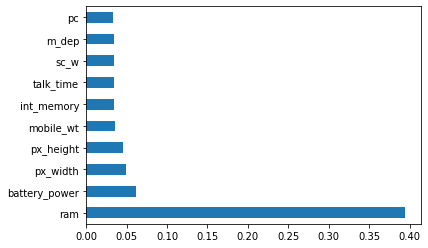

In [24]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

# Correlation

In [25]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

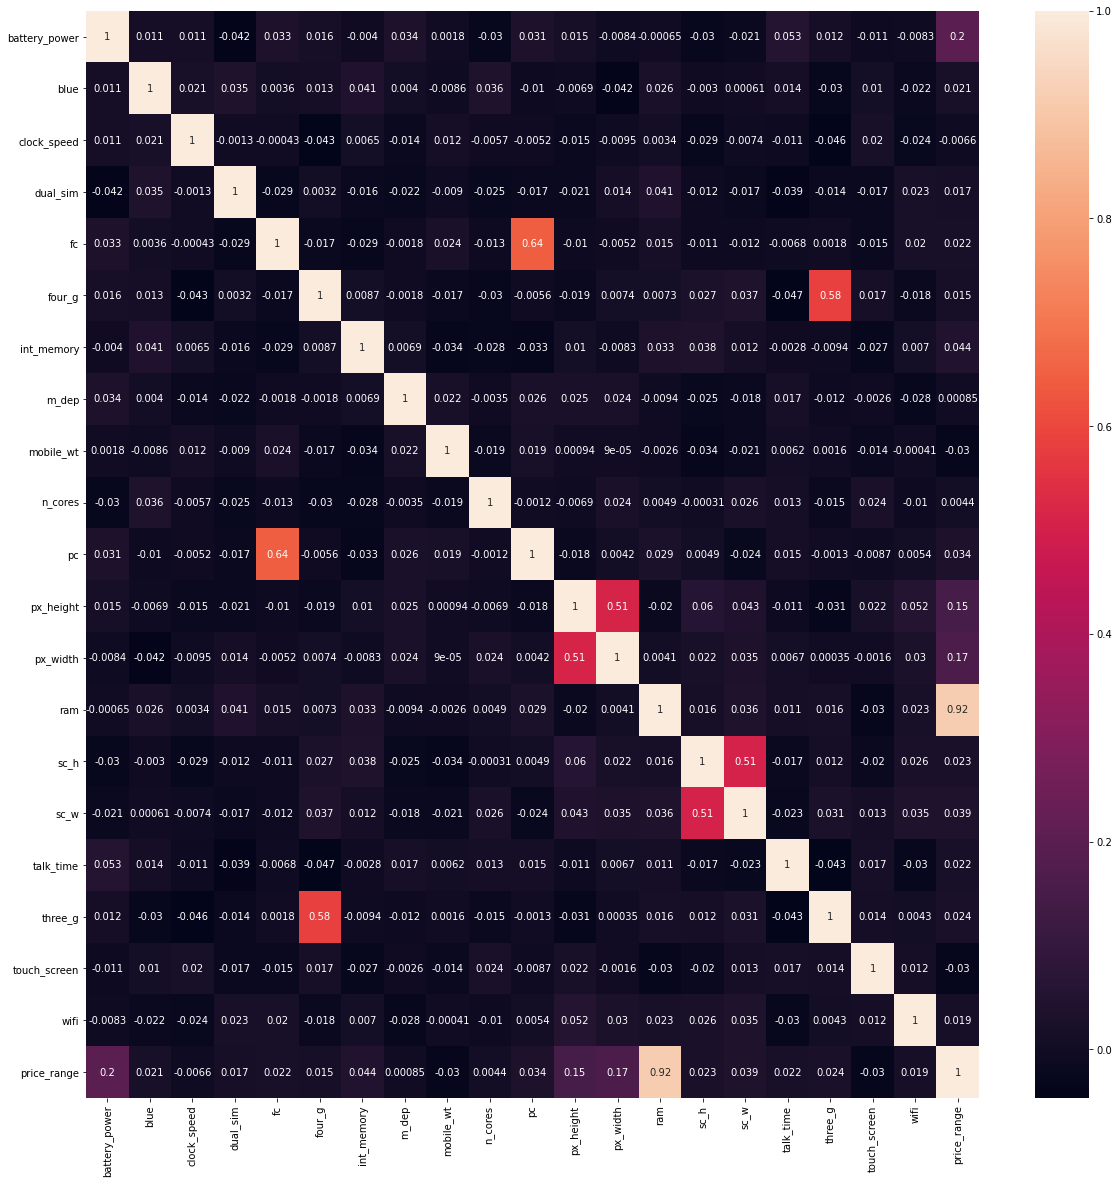

In [26]:
# with  Price range

import seaborn as sns
corr=df.corr() 
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)


<AxesSubplot:>

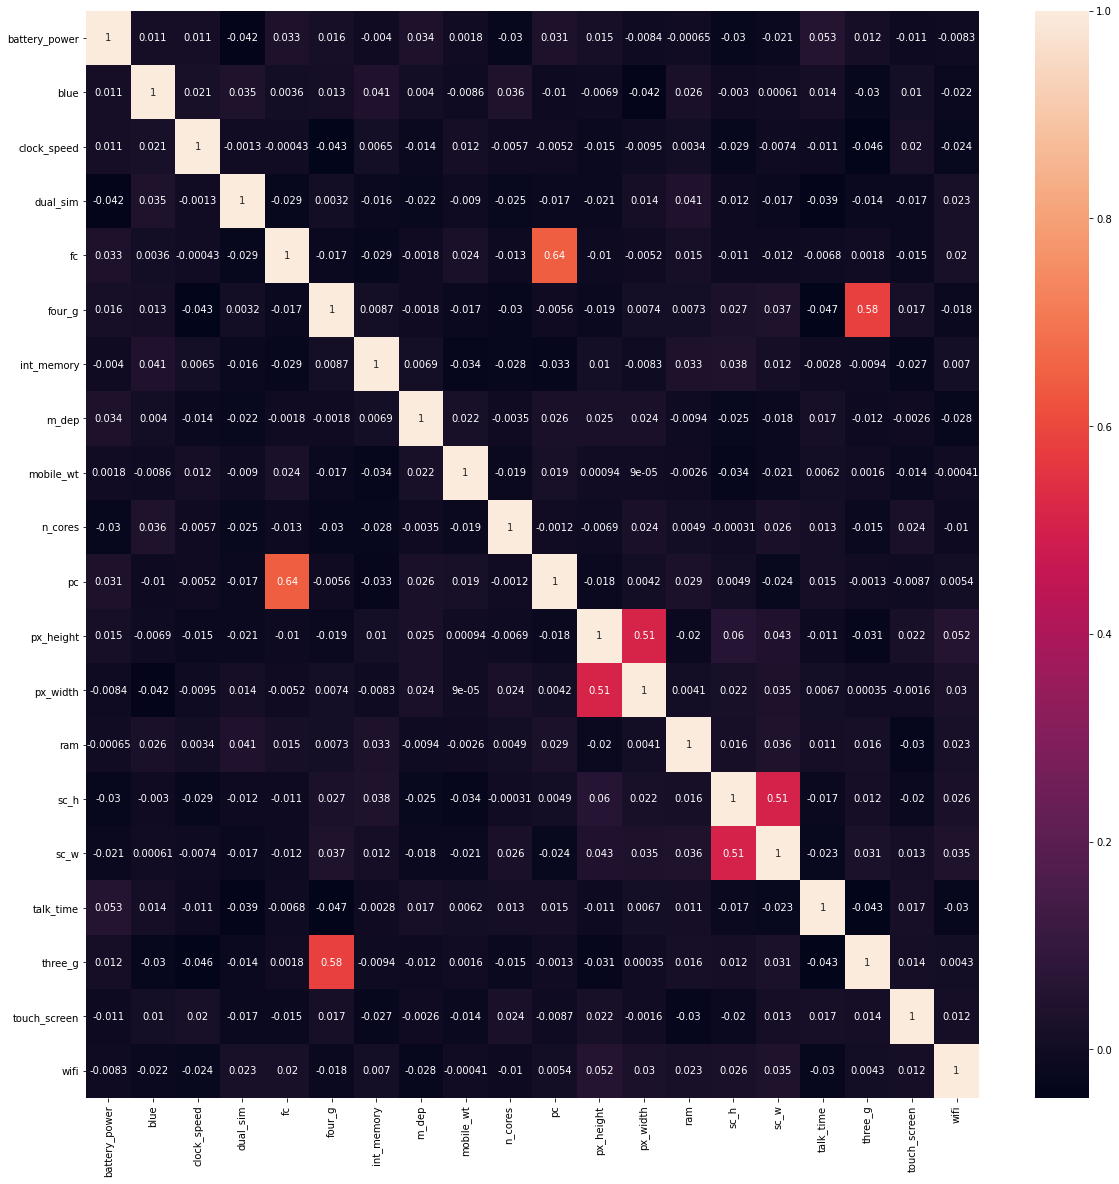

In [27]:
import seaborn as sns
corr=df.iloc[:,:-1].corr() # with drop Price range
# top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)


In [28]:
#### Remove The correlated

In [29]:
threshold=0.5

In [30]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [31]:
correlation(df.iloc[:,:-1],threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

# Information Gain

In [32]:
from sklearn.feature_selection import mutual_info_classif

In [33]:
mutual_info=mutual_info_classif(X,y)

In [34]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

ram              0.848849
wifi             0.035070
px_width         0.031652
battery_power    0.027943
px_height        0.023620
dual_sim         0.022391
int_memory       0.018223
mobile_wt        0.015470
n_cores          0.014583
sc_w             0.012052
three_g          0.006655
pc               0.005931
four_g           0.002363
clock_speed      0.002034
fc               0.000000
m_dep            0.000000
blue             0.000000
sc_h             0.000000
talk_time        0.000000
touch_screen     0.000000
dtype: float64

## Keypoints :

### 1. Lesser the p value , more  important is the feature  .


### 2. Higher  the f score, more  important is the feature .


### 3. SelectKBest  will tells us the top K  Best features.


### 4. In mutual Information : (Higher the value higher is the dependency on target)these are the most imp feature in dataset as they depend highly on target feature. It checks the dependency w.r.t Target.


### 5. Correlation  :

#### Those Independent Features That are highly Correlated with Dependent Features , we should'nt remove those features .
####                                                     But 
#### Suppose If 3 independent Features are Highly correlated with each other  by more than 90% then we can take only 1  Feature.